In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

<br>

### Анализируем таблицу board_pass

In [3]:
board_pass = pd.read_csv('data/Ready/not_norm_board_pass_1.csv', index_col='id')

In [4]:
board_pass

,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross
id,,,,,,,,
0,LIDIYA ZHDANOVA,4,3,1,0,1,0.750000,0.250000
1,SVIATOSLAV SOKOLOV,5,4,3,2,2,0.800000,0.600000
2,SVIATOSLAV SUKHANOV,8,4,4,2,3,0.500000,0.500000
3,DENIS ZELENIN,7,2,1,0,1,0.285714,0.142857
4,OSTROVSKAYA IRINA,4,2,2,0,1,0.500000,0.500000
...,...,...,...,...,...,...,...,...
127527,DANILA KOPYLOV,2,0,2,0,0,0.000000,1.000000
127528,ALLA KOROL'KOVA,2,1,2,1,2,0.500000,1.000000
127529,MESHCHERIAKOVA EVGENIIA,2,0,2,0,0,0.000000,1.000000


### Анализируем проценты подозрительных рейсов

In [5]:
board_pass.percent_cross.describe()

count    127532.000000
mean          0.424487
std           0.312126
min           0.000000
25%           0.200000
50%           0.500000
75%           0.600000
max           1.000000
Name: percent_cross, dtype: float64

In [6]:
board_pass.percent_not_ok.describe()

count    127532.000000
mean          0.538379
std           0.184377
min           0.000000
25%           0.500000
50%           0.500000
75%           0.666667
max           0.952381
Name: percent_not_ok, dtype: float64

### Границы для percent_cross >= 0.8 и percent_not_ok >= 0.6

In [7]:
board_pass_f = board_pass[board_pass['percent_cross'] >= 0.8]

In [8]:
board_pass_f = board_pass_f[board_pass_f['percent_not_ok'] >= 0.6]

In [9]:
board_pass_f.flights.describe()

count    3861.000000
mean        4.435897
std         1.820108
min         3.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        24.000000
Name: flights, dtype: float64

In [10]:
board_pass_f.reset_index(drop=True, inplace=True)

In [11]:
board_pass_f

,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross
0,SELEZNEVA ANNA A,5,3,4,3,0,0.600000,0.800000
1,BELIKOV VADIM,10,7,9,7,2,0.700000,0.900000
2,D'YAKONOV STANISLAV,6,4,5,3,2,0.666667,0.833333
3,IL'INSKIY RUSLAN,8,5,7,5,1,0.625000,0.875000
4,LYUDMILA SOROKINA,5,3,4,3,2,0.600000,0.800000
...,...,...,...,...,...,...,...,...
3856,SEVAST'YANOV IL'YA,3,2,3,2,0,0.666667,1.000000
3857,IANA ZAVIALOVA,3,2,3,2,0,0.666667,1.000000
3858,SOFIYA TARASOVA,3,2,3,2,2,0.666667,1.000000
3859,PETR GORYACHEV,3,2,3,2,2,0.666667,1.000000


### Анализируем количество полетов для полного датасета и усеченного

Text(0, 0.5, 'Count')

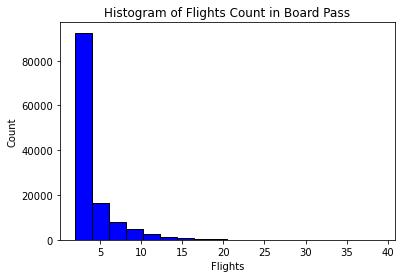

In [12]:
plt.hist(board_pass['flights'], color = 'blue', edgecolor = 'black',
         bins = int(180/10))
plt.title('Histogram of Flights Count in Board Pass')
plt.xlabel('Flights')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

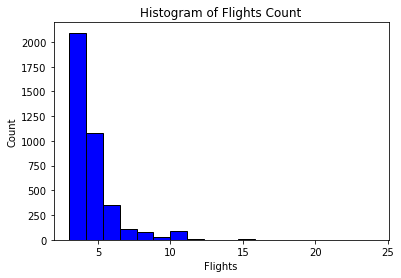

In [13]:
plt.hist(board_pass_f['flights'], color = 'blue', edgecolor = 'black',
         bins = int(180/10))
plt.title('Histogram of Flights Count')
plt.xlabel('Flights')
plt.ylabel('Count')

### Выбираем клиентов, которые летали больше 10 раз

In [14]:
board_pass_f = board_pass_f[board_pass_f['flights'] > 10]

In [15]:
board_pass_f.reset_index(drop=True, inplace=True)

In [16]:
df2 = board_pass_f.sort_values(by='flights', ascending=False).reset_index(drop=True)

### Получаем список подозрительных клиентов

In [17]:
df2

,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross
0,MARAT SHAROV,24,18,20,14,6,0.750000,0.833333
1,FOMINA KAMILLA,22,17,18,14,6,0.772727,0.818182
2,NIKIFOROV VLADISLAV,18,12,15,11,5,0.666667,0.833333
3,AMINA KALASHNIKOVA,16,11,14,9,6,0.687500,0.875000
4,KHARITONOVA NADEZHDA,16,10,13,8,5,0.625000,0.812500
5,KOVALEV SAMIR,15,10,13,8,3,0.666667,0.866667
6,EFREMOV KIRILL,15,9,14,8,3,0.600000,0.933333
7,VASILINA NIKOLAEVA,15,10,12,9,5,0.666667,0.800000
8,ZLATA BLOKHINA,15,12,13,10,2,0.800000,0.866667
9,KOTOVA MILANA,14,9,12,8,4,0.642857,0.857143


In [18]:
df2.to_csv('data/filtered/board_pass.csv', index_label='id')

<br> 

### Анализируем таблицу flights

In [101]:
flights = pd.read_csv('data/Ready/not_norm_flights_1.csv', index_col='id')

In [102]:
flights

,nickname,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross
id,,,,,,,,,
0,FrequentFlyer0,NaN,22,0,3,0,1,0.0,0.136364
1,FrequentFlyer2,ZYKOV NAZAR,20,0,11,0,1,0.0,0.550000
2,FrequentFlyer4,NaN,18,0,10,0,2,0.0,0.555556
3,FrequentFlyer5,NaN,22,0,9,0,0,0.0,0.409091
4,FrequentFlyer6,D'YAKOV RUSLAN,21,0,12,0,5,0.0,0.571429
...,...,...,...,...,...,...,...,...,...
66587,FrequentFlyer99992,NaN,13,0,7,0,2,0.0,0.538462
66588,FrequentFlyer99993,NaN,25,0,6,0,2,0.0,0.240000
66589,FrequentFlyer99995,BONDAREVA STEFANIYA,24,0,7,0,2,0.0,0.291667


### Анализируем проценты подозрительных рейсов

In [103]:
flights.percent_cross.describe()

count    66592.000000
mean         0.428462
std          0.204077
min          0.000000
25%          0.266667
50%          0.416667
75%          0.576923
max          1.000000
Name: percent_cross, dtype: float64

In [104]:
flights.percent_not_ok.describe()

count    66592.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: percent_not_ok, dtype: float64

### Анализ распределения количества полетов

Text(0, 0.5, 'Count')

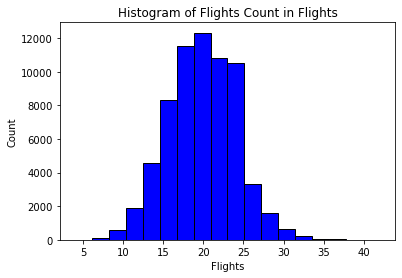

In [105]:
plt.hist(flights['flights'], color = 'blue', edgecolor = 'black',
         bins = int(180/10))
plt.title('Histogram of Flights Count in Flights')
plt.xlabel('Flights')
plt.ylabel('Count')

### Выбираем критерий для percent_cross >= 0.8 percent_not_ok все 0

In [106]:
flights_f = flights[flights['percent_cross'] >= 0.8]

### Анализруем распределения количества полетов в двух таблицах (основной и отфильтрованной)

In [107]:
flights.flights.describe()

count    66592.000000
mean        19.656821
std          4.262695
min          4.000000
25%         17.000000
50%         19.000000
75%         22.000000
max         42.000000
Name: flights, dtype: float64

In [108]:
flights_f.flights.describe()

count    2911.000000
mean       18.015459
std         3.933655
min         5.000000
25%        15.000000
50%        18.000000
75%        21.000000
max        35.000000
Name: flights, dtype: float64

### Выбираем критерий для количества полетов 20

In [109]:
flights_f = flights_f[flights_f['flights'] > 20]

In [110]:
flights_f

,nickname,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross
id,,,,,,,,,
32,FrequentFlyer46,KRASNOV VYACHESLAV,23,0,20,0,9,0.0,0.869565
70,FrequentFlyer106,MATVEEVA LIANA,25,0,23,0,6,0.0,0.920000
224,FrequentFlyer347,OZEROV MARSEL',21,0,17,0,2,0.0,0.809524
232,FrequentFlyer358,NaN,24,0,20,0,1,0.0,0.833333
374,FrequentFlyer560,DOLGOVA VIKTORIYA,28,0,23,0,6,0.0,0.821429
...,...,...,...,...,...,...,...,...,...
66357,FrequentFlyer99665,NaN,21,0,17,0,5,0.0,0.809524
66365,FrequentFlyer99678,MORGUNOV RUSLAN,25,0,21,0,5,0.0,0.840000
66368,FrequentFlyer99688,BESSONOVA ANASTASIYA,22,0,19,0,3,0.0,0.863636


### Удаляем клиентов без имен и ненужные колонки

In [111]:
flights_f.dropna(inplace=True, subset=['name'])

In [29]:
flights_f.drop(columns=['not_ok_flights', 'percent_not_ok'], inplace=True)

In [112]:
df_3 = flights_f.sort_values(by='flights', ascending=False).reset_index(drop=True)

### Получаем список подозрительных клиентов

In [113]:
df_3

,nickname,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross
0,FrequentFlyer4121,SERGEEV ROMAN,31,0,25,0,6,0.0,0.806452
1,FrequentFlyer97911,FOMINA MARINA,30,0,27,0,4,0.0,0.900000
2,FrequentFlyer37579,POLYAKOVA STEFANIYA,30,0,24,0,15,0.0,0.800000
3,FrequentFlyer24638,ANDREEV SVYATOGOR,29,0,25,0,9,0.0,0.862069
4,FrequentFlyer6645,LAPTEVA ANGELINA,29,0,24,0,7,0.0,0.827586
...,...,...,...,...,...,...,...,...,...
357,FrequentFlyer72158,DEMENT'EVA STEFANIYA,21,0,17,0,4,0.0,0.809524
358,FrequentFlyer72192,DEMENT'EV KIRILL,21,0,20,0,7,0.0,0.952381
359,FrequentFlyer72256,ZYKOVA AMINA,21,0,18,0,2,0.0,0.857143
360,FrequentFlyer27782,ERMILOV RAMIL',21,0,17,0,2,0.0,0.809524


In [37]:
df_3.to_csv('data/filtered/flights.csv', index_label='id')

<br>

### Анализируем таблицу pointz

In [38]:
pointz = pd.read_csv('data/Ready/not_norm_pointz_1.csv', index_col='id')    

In [39]:
pointz

,uid,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross
id,,,,,,,,,
0,613142142,ZVEREV IAROMIR,2,1,1,0,0,0.500000,0.500000
1,103197717,KOROVINA VITALINA,4,2,1,1,0,0.500000,0.250000
2,138879468,VAVILOV DANIL,20,0,7,0,2,0.000000,0.350000
3,197093494,LOPATIN AMIR,2,1,1,1,0,0.500000,0.500000
4,513348472,AKIMOV IAROSLAV,7,6,5,4,3,0.857143,0.714286
...,...,...,...,...,...,...,...,...,...
56938,377652963,ZINOV'EV YAROSLAV,6,2,3,1,1,0.333333,0.500000
56939,316245744,ZOLOTAREVA ALINA,11,4,5,1,0,0.363636,0.454545
56940,280456697,BONDAREVA STEFANIIA,19,5,6,2,1,0.263158,0.315789


### Анализируем количество полетов и проценты подозрительных перелетов

In [40]:
pointz.flights.describe()

count    56943.000000
mean         7.658360
std          5.155064
min          1.000000
25%          4.000000
50%          6.000000
75%         10.000000
max         35.000000
Name: flights, dtype: float64

Text(0, 0.5, 'Count')

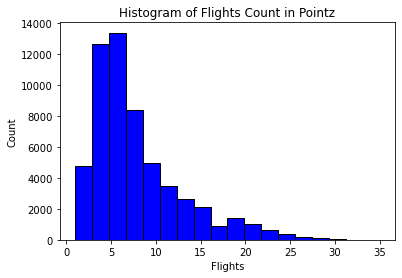

In [41]:
plt.hist(pointz['flights'], color = 'blue', edgecolor = 'black',
         bins = int(180/10))
plt.title('Histogram of Flights Count in Pointz')
plt.xlabel('Flights')
plt.ylabel('Count')

In [42]:
pointz.percent_cross.describe()

count    56943.000000
mean         0.429092
std          0.272524
min          0.000000
25%          0.230769
50%          0.400000
75%          0.615385
max          1.000000
Name: percent_cross, dtype: float64

In [43]:
pointz.percent_not_ok.describe()

count    56943.000000
mean         0.434991
std          0.225687
min          0.000000
25%          0.285714
50%          0.500000
75%          0.600000
max          0.900000
Name: percent_not_ok, dtype: float64

### Ставим границы для значений числа полетов и процентов подозрительных перелетов 10, 0.6 и 0.6 соответственно

In [44]:
pointz_f = pointz[pointz['flights'] > 10]

In [45]:
pointz_f = pointz_f[pointz_f['percent_not_ok'] > 0.6]

In [46]:
pointz_f = pointz_f[pointz_f['percent_cross'] > 0.6]

In [47]:
df4 = pointz_f.sort_values(by='flights', ascending=False).reset_index(drop=True)

### Получили список подозрительных клиентов

In [48]:
df4

,uid,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross
0,794495591,KARTASHOVA KAMILLA,16,10,11,8,6,0.625000,0.687500
1,455306832,GUSHCHIN SERGEI,14,9,9,5,3,0.642857,0.642857
2,542692765,AKSENOV ALEKSANDR,13,8,8,5,3,0.615385,0.615385
3,747392525,MASLOVA MADINA,13,8,8,5,2,0.615385,0.615385
4,376156944,ALESHINA KRISTINA,13,8,9,6,4,0.615385,0.692308
5,449434523,PAVLOVSKAIA MARGARITA,13,8,10,6,6,0.615385,0.769231
6,530794921,ARTAMONOVA MELANIYA,13,9,8,7,1,0.692308,0.615385
7,862032784,MURAVEV SAVELII,13,9,12,8,6,0.692308,0.923077
8,684433898,LEVINA ALIYA,12,9,9,6,1,0.750000,0.750000
9,182360777,CHEREPANOVA UL'YANA,12,8,8,5,4,0.666667,0.666667


In [49]:
df4.to_csv('data/filtered/pointz.csv', index_label='id')

<br>

### Анализ таблицы Sirena

In [127]:
sirena = pd.read_csv('data/Ready/not_norm_sirena_1.csv', index_col='id')

In [128]:
sirena

,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross
id,,,,,,,,
0,ОЗЕРОВ ИЛЬДАР ДАНИИЛОВИЧ,1,0,0,0,0,0.000000,0.0
1,КОЛОСОВ САМИР ТАМЕРЛАНОВИЧ,7,3,0,0,0,0.428571,0.0
2,ИГНАТОВА СНЕЖАНА КОНСТАНТИНОВНА,5,1,0,0,0,0.200000,0.0
3,ЖАРОВ ПЛАТОН АЛЬБЕРТОВИЧ,5,0,0,0,0,0.000000,0.0
4,НИКОЛЬСКИЙ НИКОЛАЙ ИГОРЕВИЧ,6,2,0,0,0,0.333333,0.0
...,...,...,...,...,...,...,...,...
72730,МАСЛОВА ЯСМИНА МАКАРЬЕВНА,1,0,0,0,0,0.000000,0.0
72731,БОЧАРОВА МИЛЕНА ДЕМИДОВНА,1,0,0,0,0,0.000000,0.0
72732,ЯКОВЛЕВ АРТЁМ АНАТОЛЬЕВИЧ,1,0,0,0,0,0.000000,0.0


### Анализируем количество полетов и проценты подозрительных перелетов

In [129]:
sirena.flights.describe()

count    72735.000000
mean         2.141431
std          1.586136
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         17.000000
Name: flights, dtype: float64

Text(0, 0.5, 'Count')

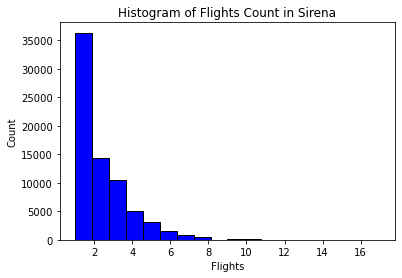

In [130]:
plt.hist(sirena['flights'], color = 'blue', edgecolor = 'black',
         bins = int(180/10))
plt.title('Histogram of Flights Count in Sirena')
plt.xlabel('Flights')
plt.ylabel('Count')

In [131]:
sirena.percent_cross.describe()

count    72735.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: percent_cross, dtype: float64

In [132]:
sirena.percent_not_ok.describe()

count    72735.000000
mean         0.083970
std          0.168786
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.800000
Name: percent_not_ok, dtype: float64

### Выставляем фильтр в 10 полетов

In [133]:
sirena_f = sirena[sirena['flights'] > 10]

In [57]:
sirena_f.drop(columns=['cross_country', 'percent_cross'], inplace=True)

D:\Programs\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Анализируем процент подозрительных перелетов на отфильтрованном датасете

In [134]:
sirena_f.percent_not_ok.describe()

count    87.000000
mean      0.185696
std       0.125278
min       0.000000
25%       0.090909
50%       0.181818
75%       0.272727
max       0.666667
Name: percent_not_ok, dtype: float64

### Выбираем уровень в 0.3

In [135]:
sirena_f = sirena_f[sirena_f['percent_not_ok'] >= 0.3]

In [136]:
df5 = sirena_f.sort_values(by=['flights', 'percent_not_ok'], ascending=False).reset_index(drop=True)

### Получаем список подозрительных клиентов

In [137]:
df5

,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross
0,ДАНИЛОВА КИРА ПЛАТОНОВНА,17,10,0,0,0,0.588235,0.0
1,ДУБОВ ЯРОМИР РАМИЛЕВИЧ,14,6,0,0,0,0.428571,0.0
2,НАУМОВА КАРИНА ВЛАДИСЛАВОВНА,13,4,0,0,0,0.307692,0.0
3,ДУБИНИН ИГОРЬ ТАМЕРЛАНОВИЧ,12,8,0,0,0,0.666667,0.0
4,КРЮЧКОВА ЗЛАТА МАРАТОВНА,12,4,0,0,0,0.333333,0.0
5,ИСАЕВА УЛЬЯНА СТАНИСЛАВОВНА,12,4,0,0,0,0.333333,0.0
6,ГОНЧАРОВ ТИХОН РОСТИСЛАВОВИЧ,11,5,0,0,0,0.454545,0.0
7,ВЕШНЯКОВА АЛИЯ ГОРДЕЕВНА,11,4,0,0,0,0.363636,0.0
8,КРУГЛОВА ЯРОСЛАВА ЯРОСЛАВОВНА,11,4,0,0,0,0.363636,0.0
9,КОНДРАТЬЕВА УЛЬЯНА ВАСИЛЬЕВНА,11,4,0,0,0,0.363636,0.0


In [62]:
df5.to_csv('data/filtered/sirena.csv', index_label='id')

<br>

### Анализ таблицы sky

In [63]:
sky = pd.read_csv('data/Ready/not_norm_sky_1.csv', index_col='id')

In [64]:
sky

,uid,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross
id,,,,,,,,,
0,438181628,AFANASEVA MELANIIA,25,0,15,0,3,0.000000,0.600000
1,326758367,MASLOVA SOFIA,22,2,20,2,3,0.090909,0.909091
2,882817776,MALININ BORIS,22,1,5,0,1,0.045455,0.227273
3,491286390,ROGOV FEDOR,15,0,14,0,4,0.000000,0.933333
4,749111794,MAKSIMOVA EVGENIYA,15,1,5,0,1,0.066667,0.333333
...,...,...,...,...,...,...,...,...,...
56938,166786088,MAKEEVA LYUBOV',7,3,5,2,1,0.428571,0.714286
56939,819220741,KARASEVA MARGARITA,4,1,4,1,0,0.250000,1.000000
56940,291072608,NIKOL'SKAYA LILIYA,5,1,1,0,0,0.200000,0.200000


### Анализируем количество полетов и проценты подозрительных перелетов

In [65]:
sky.flights.describe()

count    56943.000000
mean        19.643556
std          4.322865
min          2.000000
25%         17.000000
50%         20.000000
75%         22.000000
max         41.000000
Name: flights, dtype: float64

Text(0, 0.5, 'Count')

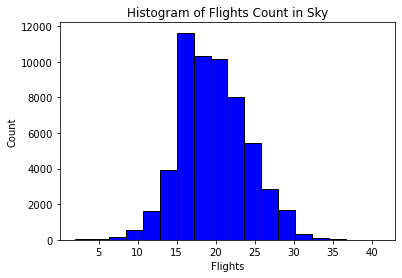

In [66]:
plt.hist(sky['flights'], color = 'blue', edgecolor = 'black',
         bins = int(180/10))
plt.title('Histogram of Flights Count in Sky')
plt.xlabel('Flights')
plt.ylabel('Count')

In [67]:
sky.percent_cross.describe()

count    56943.000000
mean         0.428818
std          0.204132
min          0.000000
25%          0.269231
50%          0.416667
75%          0.576923
max          1.000000
Name: percent_cross, dtype: float64

In [68]:
sky.percent_not_ok.describe()

count    56943.000000
mean         0.078396
std          0.091954
min          0.000000
25%          0.000000
50%          0.055556
75%          0.125000
max          0.833333
Name: percent_not_ok, dtype: float64

### Выставляем уровень в 20 перелетов, и 0,6 и 0,3 соответствующие уровни для процентов подозрительных перелетов

In [69]:
sky_f = sky[sky['flights'] >= 20]

In [70]:
sky_f = sky_f[sky_f['percent_cross'] > 0.6]

In [71]:
sky_f = sky_f[sky_f['percent_not_ok'] > 0.3]

In [72]:
df6 = sky_f.sort_values(by=['flights', 'percent_not_ok'], ascending=False).reset_index(drop=True)

### Получаем список подозрительных клиентов

In [73]:
df6

,uid,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross
0,845811801,SHISHKINA ALIIA,24,8,17,5,8,0.333333,0.708333
1,388691702,CHISTYAKOVA VITALINA,24,8,15,4,3,0.333333,0.625000
2,122669620,ANDRIANOVA AGATA,23,8,14,4,5,0.347826,0.608696
3,553947444,KUKUSHKIN FEDOR,23,8,14,2,1,0.347826,0.608696
4,779510169,FEDOTOVA INNA,23,7,14,4,2,0.304348,0.608696
5,978839642,SMIRNOVA KSENIIA,23,7,14,5,2,0.304348,0.608696
6,167175237,EREMEEVA DIANA,23,7,14,3,3,0.304348,0.608696
7,168957843,VAVILOVA DIANA,23,7,14,3,0,0.304348,0.608696
8,945188020,KORCHAGINA AMINA,22,7,16,6,9,0.318182,0.727273
9,691337165,SHAPOVALOV ANDREY,22,7,14,6,5,0.318182,0.636364


In [74]:
df6.to_csv('data/filtered/sky.csv', index_label='id')

<br>

### Пробуем соединить таблицы в одну

In [159]:
df_all = pd.concat([df2, df4, df5, df6], ignore_index=True)

### Получаем сводную таблицу

In [160]:
df_all

,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross,uid
0,MARAT SHAROV,24,18,20,14,6,0.750000,0.833333,NaN
1,FOMINA KAMILLA,22,17,18,14,6,0.772727,0.818182,NaN
2,NIKIFOROV VLADISLAV,18,12,15,11,5,0.666667,0.833333,NaN
3,AMINA KALASHNIKOVA,16,11,14,9,6,0.687500,0.875000,NaN
4,KHARITONOVA NADEZHDA,16,10,13,8,5,0.625000,0.812500,NaN
...,...,...,...,...,...,...,...,...,...
98,SAMOYLOV AL'BERT,21,7,19,6,4,0.333333,0.904762,399299029.0
99,BARANOVA MIROSLAVA,21,7,14,4,3,0.333333,0.666667,543200524.0
100,KALACHEV ZAKHAR,20,8,15,8,1,0.400000,0.750000,332437525.0
101,NAZAROVA SABINA,20,7,13,4,4,0.350000,0.650000,827328586.0


### Рассмотрим, имеются ли дубликаты

In [156]:
df_all[df_all.name.duplicated(keep=False)]

,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross,nickname,uid
10,KARPOVA KAMILLA,14,9,12,8,0,0.642857,0.857143,NaN,NaN
34,TSAREV GRIGORIY,11,7,9,7,2,0.636364,0.818182,NaN,NaN
41,KOCHETOV VADIM,11,9,10,8,6,0.818182,0.909091,NaN,NaN
99,KARPOVA KAMILLA,26,0,21,0,0,0.000000,0.807692,FrequentFlyer12912,NaN
216,TSAREV GRIGORIY,23,0,20,0,6,0.000000,0.869565,FrequentFlyer3896,NaN
331,KOCHETOV VADIM,21,0,20,0,4,0.000000,0.952381,FrequentFlyer44153,NaN


In [218]:
df_all.to_csv('data/filtered/shpionbl.csv', index_label='id')

<br>

In [198]:
df_all.percent_not_ok.describe()

count    103.000000
mean       0.599068
std        0.150361
min        0.304348
25%        0.607692
50%        0.636364
75%        0.677083
max        0.857143
Name: percent_not_ok, dtype: float64

In [199]:
df_all = df_all[df_all['percent_not_ok'] >= 0.6]

In [217]:
df_all.sort_values(by='flights', ascending=False).reset_index(drop=True)

,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross,uid
0,MARAT SHAROV,24,18,20,14,6,0.750000,0.833333,NaN
1,FOMINA KAMILLA,22,17,18,14,6,0.772727,0.818182,NaN
2,NIKIFOROV VLADISLAV,18,12,15,11,5,0.666667,0.833333,NaN
3,KHARITONOVA NADEZHDA,16,10,13,8,5,0.625000,0.812500,NaN
4,KARTASHOVA KAMILLA,16,10,11,8,6,0.625000,0.687500,794495591.0
...,...,...,...,...,...,...,...,...,...
73,PANKRATOVA SABINA,11,8,9,6,2,0.727273,0.818182,NaN
74,USPENSKII MARK,11,8,10,7,4,0.727273,0.909091,NaN
75,DANILOV IGNAT,11,7,9,5,1,0.636364,0.818182,NaN
76,IAROMIR MININ,11,8,10,8,4,0.727273,0.909091,NaN


In [201]:
total_flights = sum(df_all['flights'])

In [202]:
total_cross_country = sum(df_all['cross_country'])

In [203]:
total_not_ok = sum(df_all['not_ok_flights'])

In [204]:
total_cross_country_not_ok = sum(df_all['cross_country_not_ok'])

In [205]:
total_long = sum(df_all['long_flights'])

In [206]:
total_in_country = total_flights - total_cross_country

In [207]:
total_cross_ok = total_cross_country - total_cross_country_not_ok

## Процент международных перелетов


In [208]:
round(total_cross_country / total_flights * 100, 1)

78.6

## Процент подозрительных международных перелетов

In [209]:
round( total_cross_country_not_ok / total_flights * 100, 1)

53.8

## Процент подозрительных перелетов


In [210]:
round(total_not_ok / total_flights * 100 , 1)

67.8

## Процент обычных международных перелетов

In [211]:
round(total_cross_ok / total_flights * 100, 1)

24.8

## Процент обычных перелетов


In [212]:
round((total_flights - total_not_ok) / total_flights * 100, 1)

32.2

## Процент длительных перелетов

In [213]:
round(total_long / total_flights * 100, 1)

22.3

<br>

In [176]:
df_all.sort_values(by='flights', ascending=False).reset_index(drop=True)

,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross,uid
0,MARAT SHAROV,24,18,20,14,6,0.750000,0.833333,NaN
1,CHISTYAKOVA VITALINA,24,8,15,4,3,0.333333,0.625000,388691702.0
2,SHISHKINA ALIIA,24,8,17,5,8,0.333333,0.708333,845811801.0
3,VAVILOVA DIANA,23,7,14,3,0,0.304348,0.608696,168957843.0
4,EREMEEVA DIANA,23,7,14,3,3,0.304348,0.608696,167175237.0
...,...,...,...,...,...,...,...,...,...
98,LAVROV MAKAR,11,8,7,5,0,0.727273,0.636364,970146398.0
99,VINOKUROVA ELMIRA,11,7,7,4,1,0.636364,0.636364,612454562.0
100,KORSHUNOVA ALENA,11,7,7,5,1,0.636364,0.636364,728484467.0
101,LVOVA TATIANA,11,7,8,6,2,0.636364,0.727273,754443766.0


In [177]:
df_all.describe()

,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross,uid
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,4.700000e+01
mean,13.825243,7.902913,9.582524,5.708738,2.660194,0.599068,0.696731,5.557723e+08
std,4.171395,2.036503,4.183357,2.692149,1.997810,0.150361,0.251770,2.605433e+08
min,11.000000,4.000000,0.000000,0.000000,0.000000,0.304348,0.000000,1.226696e+08
25%,11.000000,7.000000,8.000000,5.000000,1.000000,0.607692,0.636364,3.794100e+08
50%,12.000000,8.000000,9.000000,6.000000,3.000000,0.636364,0.800000,5.432005e+08
75%,15.000000,8.000000,12.000000,7.000000,4.000000,0.677083,0.839744,7.509181e+08
max,24.000000,18.000000,20.000000,14.000000,9.000000,0.857143,1.000000,9.898455e+08


In [196]:
df_all.percent_not_ok.describe()

count    103.000000
mean       0.599068
std        0.150361
min        0.304348
25%        0.607692
50%        0.636364
75%        0.677083
max        0.857143
Name: percent_not_ok, dtype: float64

## Пробуем соединить данные с подозрительными личностями из гипотез про бонусную программу и путешествия без багажа

In [184]:
bonus = pd.read_csv('data/for_marat.csv')

In [187]:
df_all

,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross,uid
0,MARAT SHAROV,24,18,20,14,6,0.750000,0.833333,NaN
1,FOMINA KAMILLA,22,17,18,14,6,0.772727,0.818182,NaN
2,NIKIFOROV VLADISLAV,18,12,15,11,5,0.666667,0.833333,NaN
3,AMINA KALASHNIKOVA,16,11,14,9,6,0.687500,0.875000,NaN
4,KHARITONOVA NADEZHDA,16,10,13,8,5,0.625000,0.812500,NaN
...,...,...,...,...,...,...,...,...,...
98,SAMOYLOV AL'BERT,21,7,19,6,4,0.333333,0.904762,399299029.0
99,BARANOVA MIROSLAVA,21,7,14,4,3,0.333333,0.666667,543200524.0
100,KALACHEV ZAKHAR,20,8,15,8,1,0.400000,0.750000,332437525.0
101,NAZAROVA SABINA,20,7,13,4,4,0.350000,0.650000,827328586.0


In [214]:
pd.merge(df_all, bonus, how='inner', on='name').drop(columns=['uid']).sort_values(by='flights', ascending=False).rename(columns={'amountfb':'fb', 'amountke':'ke', 'amountdt':'dt', 'amountsu':'su'}).reset_index(drop=True)

,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross,fb,ke,dt,su


In [215]:
bags = pd.read_csv('data/marat_bags.csv')

In [193]:
df_all[df_all['name'] == 'НАУМОВА КАРИНА ВЛАДИСЛАВОВНА']

,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross,uid
79,НАУМОВА КАРИНА ВЛАДИСЛАВОВНА,13,4,0,0,0,0.307692,0.0,NaN


In [216]:
pd.merge(df_all, bags, how='inner', on='name').drop(columns=['uid', 'flight_amount']).sort_values(by='flights', ascending=False).rename(columns={'amount_without_bag':'w/out_bgs'}).reset_index(drop=True)

,name,flights,not_ok_flights,cross_country,cross_country_not_ok,long_flights,percent_not_ok,percent_cross,w/out_bgs


### Анализируем таблицу с полетами без багажа

In [85]:
without_bag_sirena = pd.read_csv('data/without_bag_from_sirena.csv')

In [87]:
without_bag_sirena

,name,count
0,КОЧЕРГИНА МАРЬЯНА ЛЬВОВНА,6
1,СОКОЛОВА НАТАЛЬЯ АРСЕНЬЕВНА,6
2,МАЛЬЦЕВ ВЛАД ВСЕВОЛОДОВИЧ,6
3,КАЛМЫКОВ МАКАР СТАНИСЛАВОВИЧ,5
4,КИСЕЛЕВА НАТАША АНАТОЛЬЕВНА,5
...,...,...
23309,ЗОЛОТАРЕВА СОФЬЯ ЯРОМИРОВНА,1
23310,ПАРАМОНОВ ЭДУАРД ЯРОСЛАВОВИЧ,1
23311,ЗАЙЦЕВ НАЗАР МАРАТОВИЧ,1
23312,МАТВЕЕВА ОКСАНА ИВАНОВНА,1


### Смотрим распределение количества полетов без багажа

Text(0, 0.5, 'Count')

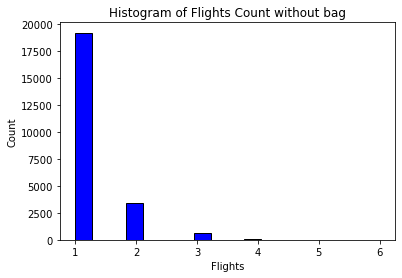

In [89]:
plt.hist(without_bag_sirena['count'], color = 'blue', edgecolor = 'black',
         bins = int(180/10))
plt.title('Histogram of Flights Count without bag')
plt.xlabel('Flights')
plt.ylabel('Count')

In [91]:
df_sirena = pd.merge(df5, without_bag_sirena, how='inner', on='name')

### Получили клиентов, которые подозрительные и часто летали без багажа

In [92]:
df_sirena

,name,flights,not_ok_flights,percent_not_ok,count
0,ДАНИЛОВА КИРА ПЛАТОНОВНА,17,10,0.588235,3
1,ДУБОВ ЯРОМИР РАМИЛЕВИЧ,14,6,0.428571,3
2,НАУМОВА КАРИНА ВЛАДИСЛАВОВНА,13,4,0.307692,5
3,ДУБИНИН ИГОРЬ ТАМЕРЛАНОВИЧ,12,8,0.666667,1
4,КРЮЧКОВА ЗЛАТА МАРАТОВНА,12,4,0.333333,2
5,ИСАЕВА УЛЬЯНА СТАНИСЛАВОВНА,12,4,0.333333,1
6,ГОНЧАРОВ ТИХОН РОСТИСЛАВОВИЧ,11,5,0.454545,3
7,ВЕШНЯКОВА АЛИЯ ГОРДЕЕВНА,11,4,0.363636,2
8,КРУГЛОВА ЯРОСЛАВА ЯРОСЛАВОВНА,11,4,0.363636,2
9,КОНДРАТЬЕВА УЛЬЯНА ВАСИЛЬЕВНА,11,4,0.363636,1


In [93]:
df_sirena.to_csv('data/filtered/sirena_with_bags.csv', index_label='id')